<a href="https://colab.research.google.com/github/ScienceLeo/Sprint_01/blob/main/MVP_Srpint_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Sprint: Análise de Dados e Boas Práticas**

# **1. Definição do problema**

  
   O desafio central deste projeto é criar um sistema de dimensionamento de equipes que atenda à demanda de serviços da Corporação de forma eficiente. Isso implica encontrar um equilíbrio entre a quantidade ideal de recursos humanos alocados para as diferentes tarefas, maximizando a produtividade e minimizando os serviços improdutivos. O objetivo é assegurar que a distribuidora possa suprir as necessidades de manutenção, reparos e atendimento ao cliente, mantendo-se dentro do orçamento estabelecido para o ano de 2024.
  
  ## 1.1. Descrição do Problema

  O desafio em questão está relacionado ao planejamento estratégico das equipes de trabalho envolvidas nos serviços prestados pela Companhia. Isso inclui a identificação dos recursos humanos necessários, considerando variáveis como a demanda por serviços, a complexidade das tarefas, as especificidades regionais, e outros fatores que impactam diretamente na eficiência e qualidade do atendimento.

  ## 1.2. Natureza do Problema

  Trata-se de um problema complexo de otimização, que pode ser abordado tanto com técnicas de aprendizado supervisionado quanto não supervisionado. A abordagem de aprendizado supervisionado pode ser utilizada para prever a demanda futura com base em dados históricos, enquanto técnicas de não supervisionado podem ser aplicadas para identificar padrões e segmentar diferentes regiões ou tipos de serviços.

  ## 1.3. Premissas e Hipóteses

  Para resolver esse desafio, partimos da premissa de que os dados históricos sobre a demanda de serviços, informações sobre os tipos de serviços prestados e as condições temporais e sazonais são cruciais para prever as necessidades futuras de recursos humanos. Além disso, presumimos que a Corporação possui registros precisos e completos sobre as atividades realizadas.

  ## 1.4. Restrições e Condições dos Dados

  As restrições e condições impostas para a seleção dos dados incluem a disponibilidade de registros detalhados de serviços realizados, dados históricos sobre a demanda por serviços ao longo do tempo, informações sobre os recursos humanos alocados para esses serviços, dados geográficos relevantes e indicadores de desempenho.

  ## 1.5. Atributos do Dataset

  Os atributos do dataset incluem, mas não se limitam a:

  *   Quantidades de serviços efetivos e improdutivos
  *   Tipos de serviços prestado
  *   Data e hora da execução do serviço
  *   Localização dos serviços
  *   Duração do serviço de execução
  *   Métricas de desempenho do serviço
  *   Demanda prevista ou real por serviços

Descrição das informações de cada atributo

  *   **ordem_servico:** Documento oficial registrado na solicitação dos serviços pelos clientes.
  *   **cod_servico:** Código representando o tipo de serviço requisitado pelos clientes.
  *   **conclusao:** Código indicando a conclusão do serviço executado pela equipe, informando se foi realizado, impedido ou se é improdutivos.
  *   **dt_saida:** Data e hora em que a equipe partiu para realizar o serviço.
  *   **dt_inicio:** Data e hora do início da execução do serviço pela equipe.
  *   **dt_fim:** Data e hora do término da execução do serviço pela equipe.
  *   **dt_termino:** Data e hora em que a equipe retornou do serviço realizado ou partiu para o próximo atendimento.
  *   **cod_local:** Código da localidade onde o serviço foi prestado aos clientes.
  *   **km:** Total de quilômetros percorridos pela equipe para atender o serviço.
  *   **status:** Estado de conclusão do serviço, classificando se foi executado, impedido ou é improdutivos.
  *   **grupo:** Categorias que agrupam diferentes tipos de serviços.
  *   **Tipo_equipe:** Tipo de equipe adequado para executar determinado serviço, considerando as regulamentações vigentes.
  
  

# **2. Análise dos Dados**

## 2.1. Carregando as Bibliotecas

In [1]:
# Importação de pacotes
import pandas as pd # para manipulação e análise de dados
import numpy as np #para computação numérica em Python
import seaborn as sns # para visualização de dados construída sobre o Matplotlib
import matplotlib.pyplot as plt #para visualização de dados em Python
import matplotlib.ticker as mtick  # Importando módulo para formatação de ticks
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

## 2.2. Carregando o Dataset e Criando Dataframe

Inicialmente, utilizamos um dataset fornecido pela empresa, que passou por um processo de tratamento cuidadoso. Todas as informações de identificação sensíveis foram devidamente descaracterizadas para preservar a privacidade dos dados corporativos.

Posteriormente, o dataset foi extraído do banco de dados e carregado no GitHub. Essa estratégia permitiu o acesso aos dados por meio do Google Colab, onde realizamos as análises e manipulações necessárias para explorar as informações contidas nos dados.

In [2]:
# Importando dados de uma URL do repositório GitHub para um dataframe

url_dados = 'https://media.githubusercontent.com/media/ScienceLeo/Sprint_01/main/tb_dados.csv'

In [3]:
# Carregando o dataframe dimensionamento pelos dados apresentados

df_dimensionamento = pd.read_csv(url_dados, low_memory=False)

## 2.3. Estatísticas descritivas

### 2.3.1. Quantidades de atributos e de instâncias do dataframe

In [4]:
#df_dimensionamento.shape
num_atributos = df_dimensionamento.shape[1]
num_instancias = df_dimensionamento.shape[0]

print(f'Dataframe contém {num_atributos} atributos.')
print(f'Dataframe contém {num_instancias:,}'.replace(',', '.') + ' instâncias.')

Dataframe contém 12 atributos.
Dataframe contém 3.354.326 instâncias.


Verificou-se que o dataframe contém ótimos números de registros para as análises, o qual apresenta 12 atributos e 3.354.326 instâncias.

### 2.3.2. Tipos de dados dos atributos no dataframe

In [5]:
tipos_de_dados = df_dimensionamento.dtypes
print(f'Os dados em seus atributos apresnetam os seguintes tipos:\n\n{tipos_de_dados}')

Os dados em seus atributos apresnetam os seguintes tipos:

ordem_servico    object
cod_servico       int64
conclusao        object
dt_saida         object
dt_inicio        object
dt_fim           object
dt_termino       object
cod_local         int64
km                int64
status           object
grupo            object
Tipo_equipe      object
dtype: object


Parece que a maioria dos atributos do dataframe está sendo interpretada como strings (object), inclusive aqueles relacionados a datas (dt_saida, dt_inicio, dt_fim, dt_termino), bem como outras colunas como ordem_servico, conclusao, status, grupo e Tipo_equipe. Para viabilizar análises temporais ou realizar cálculos com datas, é fundamental converter esses atributos para o tipo de dado correto, que seria o tipo datetime.

Além disso, identificamos a necessidade de alterar os tipos de dados dos atributos cod_serviço e cod_local, de integer (int64) para string (object). Esses campos são usados para identificar os grupos e as localidades dos serviços, respectivamente.

### 2.3.3. Análise das 10 (dez) primeiras linhas do dataframe

In [6]:
df_dimensionamento.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL


1. Atributos Relevantes:

Os atributos relacionados a informações de datas de saída, início, fim e término (dt_saida, dt_inicio, dt_termino, dt_fim) são relevantes para análise e solução do problema, juntamente com o código do serviço (cod_servico), status do servico (status) e grupo de serviços (grupo). Além disso, existe uma variação nos tipos de equipe, sendo categorizados como 'DUPLA' e 'INDIVIDUAL', e isso será relevante para a tomada de decisão no dimensionamento de equipes.

2. Formato das Datas:

Os atributos relacionados a datas, como dt_saida, dt_inicio, dt_fim, dt_termino, estão formatados como strings. É importante convertê-los para o formato de data (datetime) para facilitar as operações temporais.

3. Outliers ou Inconsistências:

Não há informações suficientes nas primeiras linhas para determinar a presença de outliers, valores faltantes ou inconsistências nos dados. Será necessário explorar mais o dataset para identificar tais questões.


Essas são algumas observações iniciais com base nas primeiras linhas do dataset. É importante explorar mais profundamente o conjunto de dados para uma análise mais detalhada e identificar padrões, tendências ou problemas que possam afetar o processo de dimensionamento de equipes.






In [7]:
# Visualizando as 10 (dez) últimas instâncias do dataframe
df_dimensionamento.tail(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
3354316,LES203936320,6001,89.39,2023-10-30 22:00:00,2023-10-30 22:28:00,2023-10-30 23:53:00,2023-10-30 23:53:00,2524,1,emergencial,Grupo_9999,DUPLA
3354317,NRT154464275,6001,89.39,2023-10-30 21:21:00,2023-10-30 22:50:00,2023-10-30 23:53:00,2023-10-31 00:17:00,2992,58,emergencial,Grupo_9999,DUPLA
3354318,NRO155170015,6001,40.04,2023-10-30 23:14:00,2023-10-30 23:18:00,2023-10-30 23:54:00,2023-10-31 00:51:00,1372,32,emergencial,Grupo_9999,DUPLA
3354319,LES203938980,6001,49.54,2023-10-30 23:17:00,2023-10-30 23:26:00,2023-10-30 23:55:00,2023-10-31 00:19:00,7072,17,emergencial,Grupo_9999,DUPLA
3354320,OES207953620,6002,93.82,2023-10-30 22:36:00,2023-10-30 23:48:00,2023-10-30 23:56:00,2023-10-30 23:56:00,4924,30,emergencial,Grupo_9999,DUPLA
3354321,NRO155157135,6001,52.20,2023-10-30 23:44:00,2023-10-30 23:50:00,2023-10-30 23:56:00,2023-10-31 00:44:00,6928,26,emergencial,Grupo_9999,DUPLA
3354322,NRO155179885,6001,23.04,2023-10-30 23:08:00,2023-10-30 23:42:00,2023-10-30 23:56:00,2023-10-30 23:56:00,1420,8,emergencial,Grupo_9999,DUPLA
3354323,NRT154467950,6002,41.13,2023-10-30 22:52:00,2023-10-30 23:35:00,2023-10-30 23:56:00,2023-10-31 00:16:00,4138,37,emergencial,Grupo_9999,DUPLA
3354324,OES207907455,6001,52.20,2023-10-30 23:50:00,2023-10-30 23:54:00,2023-10-30 23:57:00,2023-10-30 23:57:00,7294,1,emergencial,Grupo_9999,DUPLA
3354325,LES203945280,6001,51.03,2023-10-30 23:45:00,2023-10-30 23:48:00,2023-10-30 23:59:00,2023-10-30 23:59:00,7072,1,emergencial,Grupo_9999,DUPLA


### 2.3.4. Verificar dados faltantes, descrepantes ou inconsistentes

In [8]:
valores_faltantes = df_dimensionamento.isnull().sum()
print(f'{valores_faltantes} \n\nExistem valores importantes, faltantes nos atributos de dt_saida e dt_inicio, conforme pode se verificar a acima.')

ordem_servico       0
cod_servico         0
conclusao           0
dt_saida         3752
dt_inicio         303
dt_fim              0
dt_termino          0
cod_local           0
km                  0
status              0
grupo               0
Tipo_equipe         0
dtype: int64 

Existem valores importantes, faltantes nos atributos de dt_saida e dt_inicio, conforme pode se verificar a acima.


Sim, verificou-se que há valores faltantes em algumas colunas do dataset.

- `dt_saida` possui 3752 valores faltantes.
- `dt_inicio` possui 303 valores faltantes.

Esses valores faltantes podem impactar nas análises, principalmente porque esta no planejamento utilizar essas colunas para operações temporais ou cálculos baseados em datas.

Existem algumas maneiras de lidar com esses valores faltantes:

1. Remoção dos Registros: Se a quantidade de valores faltantes for relativamente pequena em comparação com o tamanho total do seu dataset, você pode optar por remover esses registros específicos que possuem valores faltantes nessas colunas.

2. Preenchimento dos Valores Faltantes: Dependendo do contexto e da natureza dos dados, você pode preencher os valores faltantes com informações apropriadas, como uma data padrão, média dos valores existentes, ou outros métodos de imputação.

3. Ignorar Esses Campos para Análises Específicas: Em algumas situações, você pode optar por não utilizar essas colunas específicas que possuem muitos valores faltantes em análises que não requerem esses dados.

Antes de tomar qualquer decisão, é importante entender o impacto desses valores faltantes em relação aos objetivos de análise e no modelo de negócio em questão. Considerar o contexto dos dados e qual seria a abordagem mais apropriada para lidar com esses valores ausentes, garantirá que a análise ou modelo seja robusto e preciso.

### 2.3.5. Resumo estatístico dos atributos com valor numérico

In [9]:
resumo_estatistico = df_dimensionamento.describe()
print(f'Resumo estatístico do dataframe\n\ {resumo_estatistico}')

Resumo estatístico do dataframe
\         cod_servico     cod_local            km
count  3.354326e+06  3.354326e+06  3.354326e+06
mean   2.688824e+03  4.330283e+03  8.350610e+01
std    3.302205e+03  1.900460e+03  5.218010e+03
min    1.010000e+02  1.006000e+03  0.000000e+00
25%    4.090000e+02  2.524000e+03  1.000000e+00
50%    5.010000e+02  4.360000e+03  3.000000e+00
75%    6.001000e+03  5.704000e+03  1.000000e+01
max    9.999000e+03  7.882000e+03  3.610022e+06


O resumo estatístico fornece uma visão abrangente dos atributos numéricos presentes no conjunto de dados.

- cod_servico: este atributo contém os códigos associados às ordens de serviço requisitadas pelos clientes, que serão posteriormente atendidas pelas equipes da empresa.

- cod_local: refere-se aos códigos que identificam as localidades onde os serviços foram realizados, conforme as especificações contidas nas ordens.
Similarmente ao atributo cod_servico, os registros neste campo também precisam ser ajustados de inteiro para string, para melhor representação textual e tratamento posterior.

- quilômetros: representa a distância em quilômetros associada a cada ordem de serviço. Compreende aproximadamente 3.354.326 registros, a média, o desvio padrão que é de aproximadamente 5.218,01 quilômetros. Além disso, o menor valor observado é 0, enquanto o maior valor é notavelmente alto, atingindo 3.610.022 quilômetros.


Esses detalhes estatísticos que proporcionam insights valiosos sobre a distribuição, variabilidade e extremos dos dados, sendo fundamentais para a compreensão e análise aprofundada do conjunto de dados, que faremos a seguir.

# **3. Vizualização de dados - Parte I**

## 3.1. Verificando a distribuição dos atributos númericos

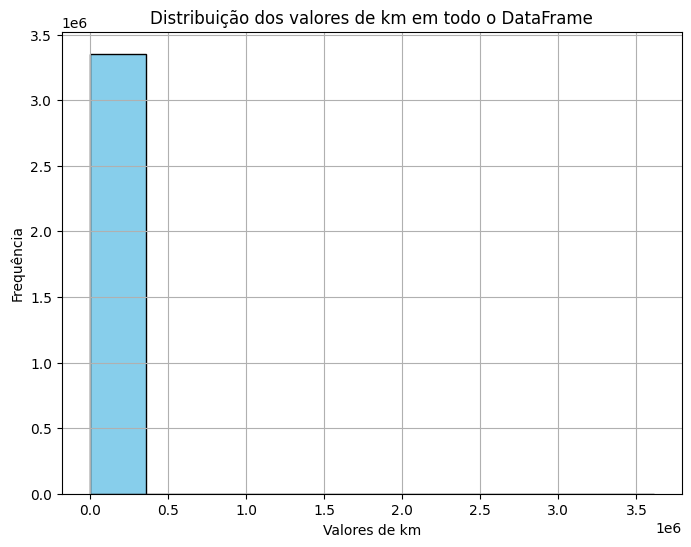

In [10]:
# Extrair os valores da coluna 'km' do DataFrame completo
valores_km = (df_dimensionamento['km'])

# Criar o histograma
plt.figure(figsize=(8, 6))
plt.hist(valores_km, bins=10, color='skyblue', edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.xlabel('Valores de km')
plt.ylabel('Frequência')
plt.title('Distribuição dos valores de km em todo o DataFrame')
plt.grid(True)
plt.show()

Para enriquecer nossas análises de dados, contamos com ferramentas visuais, como o histograma, que desempenham um papel fundamental na identificação e compreensão do comportamento dos dados. Esse tipo de gráfico nos permite visualizar a distribuição das frequências de valores em determinados atributos de um DataFrame.

O histograma é valioso porque oferece uma representação visual da ocorrência de valores específicos em um conjunto de dados. Ele mostra a distribuição das frequências, permitindo identificar padrões, tendências e outliers nos dados. Isso nos ajuda a tomar decisões informadas e a planejar os próximos passos das análises de forma mais embasada e precisa.

Observando o histograma anterior, notamos que a visualização nos forneceu apenas uma visão geral, indicando uma concentração dos dados em uma faixa específica. A fim de aprimorar essa visualização e buscar novas informações, optaremos por uma abordagem logarítmica na construção do histograma.

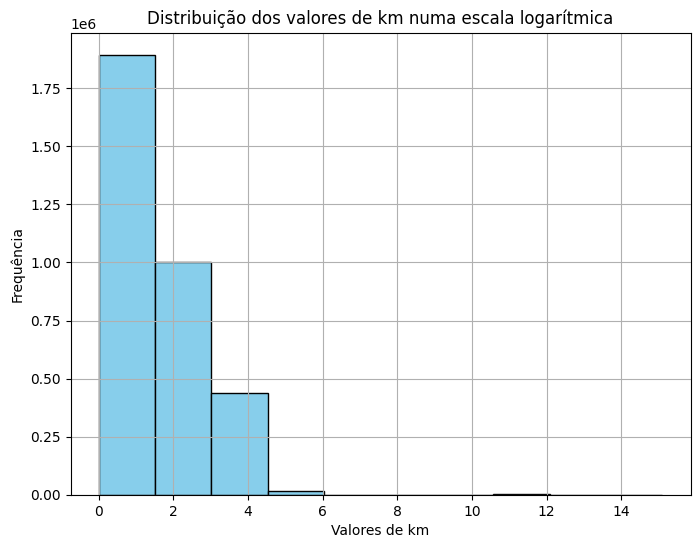

In [11]:
# Convertendo para o tipo de dado datetime
df_dimensionamento['dt_saida'] = pd.to_datetime(df_dimensionamento['dt_saida'])
df_dimensionamento['dt_inicio'] = pd.to_datetime(df_dimensionamento['dt_inicio'])
df_dimensionamento['dt_fim'] = pd.to_datetime(df_dimensionamento['dt_fim'])
df_dimensionamento['dt_termino'] = pd.to_datetime(df_dimensionamento['dt_termino'])

# Extrair os valores da coluna 'km' do DataFrame
valores_km = df_dimensionamento['km']

# Criar o histograma com escala logarítmica nos bins
plt.figure(figsize=(8, 6))
plt.hist(np.log1p(valores_km), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Valores de km')
plt.ylabel('Frequência')
plt.title('Distribuição dos valores de km numa escala logarítmica')
plt.grid(True)
plt.show()


Ao aplicar a escala logarítmica, buscamos identificar nuances ou padrões que possam estar ocultos na distribuição dos valores. Essa transformação pode revelar detalhes adicionais, especialmente em áreas com menor densidade de dados, permitindo uma análise mais aprofundada e uma compreensão mais completa do comportamento do atributo em questão.

Essa nova abordagem revelou informações mais valiosas e abrangentes sobre a distribuição dos valores de 'km', destacando aspectos que podem ser imperceptíveis em uma escala linear. Isso proporciona uma compreensão mais ampla e detalhada do comportamento desse atributo, sendo uma ferramenta valiosa para análises mais precisas e insights mais profundos.

A análise do histograma sugere que a maioria esmagadora dos serviços prestados pela Companhia envolve a cobertura de distâncias de até 25 quilômetros. No entanto, a presença de valores atípicos ou outliers, embora observada na visualização, requer uma investigação mais aprofundada e minuciosa para confirmar essa possibilidade. Esses pontos serão objeto de análises adicionais para melhor compreensão e identificação de eventuais discrepâncias nos dados.

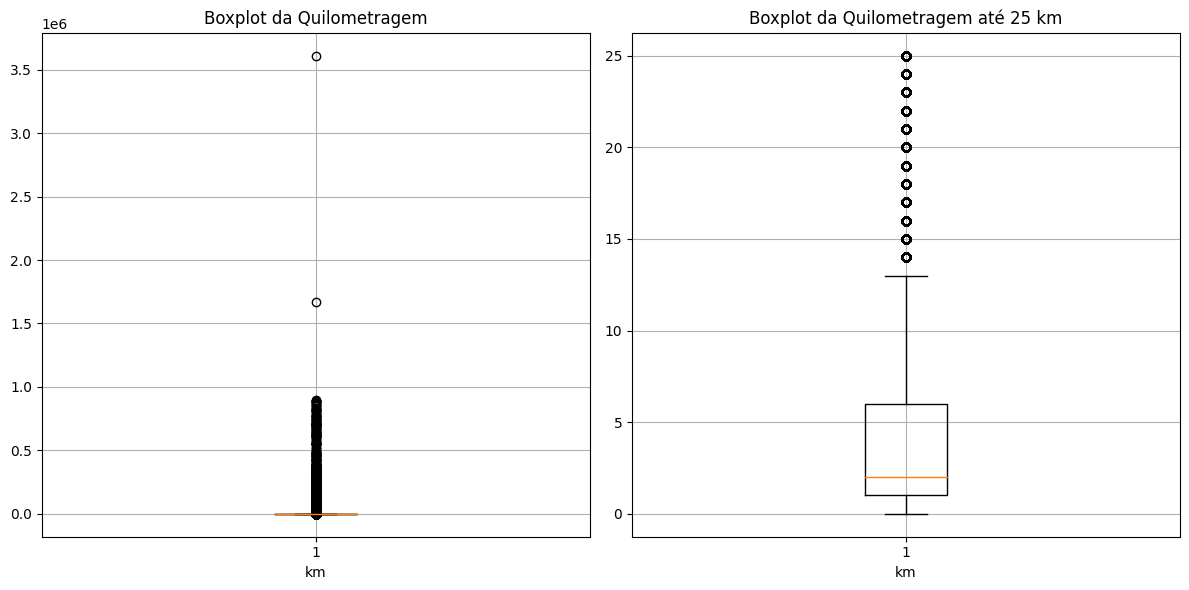

In [12]:
# Definir tamanho da figura e criar subplots com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Criar o boxplot para a coluna 'km'
axs[0].boxplot(df_dimensionamento['km'], vert=True)
axs[0].set_xlabel('km')
axs[0].set_title('Boxplot da Quilometragem')
axs[0].grid(True)

# Filtrar os dados para considerar apenas os valores de 'km' até 25 km
df_filtered_km = df_dimensionamento[df_dimensionamento['km'] <= 25]

# Criar o boxplot para a coluna 'km' filtrada
axs[1].boxplot(df_filtered_km['km'], vert=True)
axs[1].set_xlabel('km')
axs[1].set_title('Boxplot da Quilometragem até 25 km')
axs[1].grid(True)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()

A fim de ampliar a análise da distribuição do atributo 'km', optamos por utilizar o gráfico de boxplot. Esta visualização nos permite identificar de forma eficiente a presença de valores discrepantes, conhecidos como outliers, no conjunto de dados analisado.

Ao restringir a apresentação do boxplot a um limite máximo de 25 quilômetros, notamos uma considerável melhoria na clareza do gráfico, sugerindo a supressão completa dos outliers. No entanto, é importante ressaltar que essa abordagem inicial, embora promissora, necessita de análises mais aprofundadas e a aplicação de técnicas específicas para compreender e tratar adequadamente as discrepâncias identificadas nos dados.

## 3.2. Verificando a distribuição dos atributos grupo de serviços

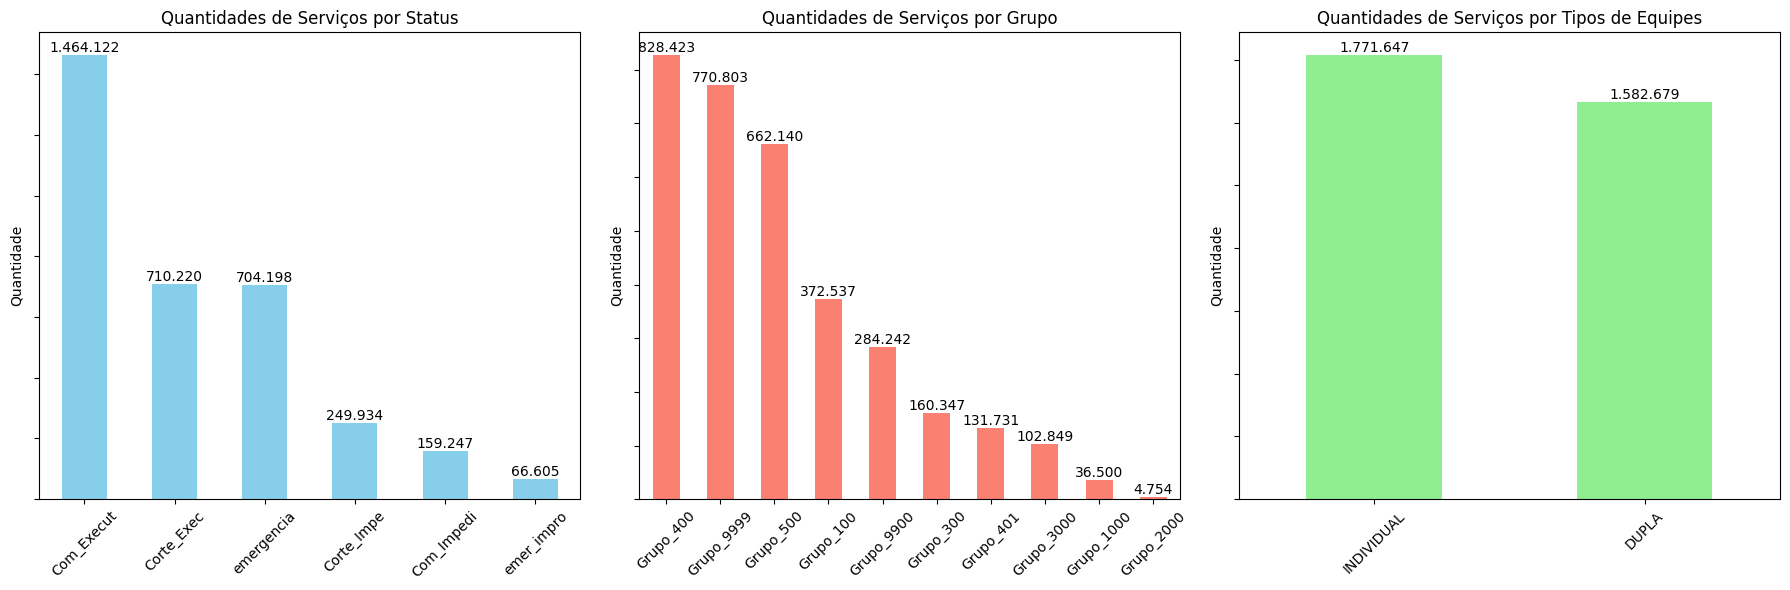

In [13]:
# Contagem das categorias em status dos serviços, grupo de serviços e Tipo de equipe para execução
status_counts = df_dimensionamento['status'].value_counts()
status_counts.index = status_counts.index.map(lambda x: x[:10])

# Configuração do gráfico de barras para 'status'
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: status dos serviços
bars1 = status_counts.plot(kind='bar', color='skyblue', ax=axs[0])
bars1.set_title('Quantidades de Serviços por Status')
#bars1.set_xlabel('Status')
bars1.set_ylabel('Quantidade')
bars1.set_xticklabels(status_counts.index, rotation=45)
bars1.yaxis.set_major_formatter(mtick.NullFormatter())

for index, value in enumerate(status_counts):
    formatted_value = '{0:,.0f}'.format(value).replace(',', '.')
    bars1.annotate(formatted_value, xy=(index, value), ha='center', va='bottom')

# Gráfico 2: grupo de serviços
grupo_counts = df_dimensionamento['grupo'].value_counts()
grupo_counts.index = grupo_counts.index.map(lambda x: x[:10])

bars2 = grupo_counts.plot(kind='bar', color='salmon', ax=axs[1])
bars2.set_title('Quantidades de Serviços por Grupo')
#bars2.set_xlabel('Grupo')
bars2.set_ylabel('Quantidade')
bars2.set_xticklabels(grupo_counts.index, rotation=45)
bars2.yaxis.set_major_formatter(mtick.NullFormatter())

for index, value in enumerate(grupo_counts):
    formatted_value = '{0:,.0f}'.format(value).replace(',', '.')
    bars2.annotate(formatted_value, xy=(index, value), ha='center', va='bottom')

# Gráfico 3: Tipo de equipe para execução
tipo_equipe_counts = df_dimensionamento['Tipo_equipe'].value_counts()
tipo_equipe_counts.index = tipo_equipe_counts.index.map(lambda x: x[:10])

bars3 = tipo_equipe_counts.plot(kind='bar', color='lightgreen', ax=axs[2])
bars3.set_title('Quantidades de Serviços por Tipos de Equipes')
#bars3.set_xlabel('Tipo de Equipe')
bars3.set_ylabel('Quantidade')
bars3.set_xticklabels(tipo_equipe_counts.index, rotation=45)
bars3.yaxis.set_major_formatter(mtick.NullFormatter())

for index, value in enumerate(tipo_equipe_counts):
    formatted_value = '{0:,.0f}'.format(value).replace(',', '.')
    bars3.annotate(formatted_value, xy=(index, value), ha='center', va='bottom')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()




Além dos atributos numéricos, é crucial considerar os atributos categóricos, já que também oferecem insights valiosos para a tomada de decisões estratégicas. No contexto do dimensionamento de equipes, alguns desses atributos apresentam informações relevantes.

A análise das quantidades de serviços por grupo, por status de conclusão e por tipo de equipe oferece uma compreensão profunda das necessidades operacionais da empresa. Para isso, elaboramos três gráficos de barra distintos.

Ao observar o gráfico que mostra as quantidades de serviços por tipo de equipe, nota-se que mais da metade dos serviços pode ser realizada por equipes individuais. Essa é uma primeira impressão a ser considerada, contudo, é essencial validar esses números com as necessidades específicas da empresa e as regras de negócio antes de qualquer tomada de decisão.

# **4. Pré-processamento de dados**

## 4.1. Análise estatístico descritivo

O resumo estatístico mostrado pelos atributos numéricos do dataframe revelam algumas informações valiosas.

Em relação aos KMs:

O menor valor (min) da quilometragem é 0.
O maior valor (max) da quilometragem é 3.610.022.
A mediana (50%) está em 3, indicando que metade dos valores estão abaixo desse número.
A média (mean) está em aproximadamente 83.51, com um desvio padrão (std) alto devido à variação considerável dos dados.

Em relação ao cod_servico:

O menor valor (min) do código de serviço é 101.
O maior valor (max) do código de serviço é 9999.
A mediana (50%) está em torno de 501, o que indica uma distribuição mais concentrada na metade inferior dos códigos de serviço.
A média (mean) está em aproximadamente 2688, com um desvio padrão (std) considerável, indicando uma certa dispersão em torno da média.

Em relação ao cod_local:

O menor valor (min) do código local é 1006.
O maior valor (max) do código local é 7882.
A mediana (50%) está em torno de 4360, similar ao código de serviço.
A média (mean) está aproximadamente em 4330, com um desvio padrão (std) de magnitude considerável.

Observações:

Embora os códigos de serviços (cod_servico), devem ser ajustados para string, um dado interessante, foi o valor da mediana estar próximo a0 501, o que pertencem a um grupo de serviçco especifico, que pode ter relevancia nas análise para o dimensionamento, que é o grupo de religas.
Quanto aos códigos de localidades, devem ser ajustados para string e realizar outros análises, com os dados ajustados e adequados.

Já em relação as quilometragens, há uma grande variação nos valores de km, com um desvio padrão alto em comparação com a média, o que sugere a presença de valores discrepantes (outliers).
Seria importante investigar mais profundamente os valores extremos (outliers) nesta variável para determinar se eles são legítimos ou se representam erros ou dados incorretos. Além disso, a presença de valores ausentes em algumas colunas também pode impactar a precisão das análises e modelos construídos com esses dados.

In [14]:
# Visualização das informações estatísticas do dataframe
df_dimensionamento.describe()

,cod_servico,cod_local,km
count,3.354326e+06,3.354326e+06,3.354326e+06
mean,2.688824e+03,4.330283e+03,8.350610e+01
std,3.302205e+03,1.900460e+03,5.218010e+03
min,1.010000e+02,1.006000e+03,0.000000e+00
25%,4.090000e+02,2.524000e+03,1.000000e+00
50%,5.010000e+02,4.360000e+03,3.000000e+00
75%,6.001000e+03,5.704000e+03,1.000000e+01
max,9.999000e+03,7.882000e+03,3.610022e+06


## 4.2. Convertendo atributos de um tipo de dados para outro

In [15]:
# Visualizando as colunas do dataframe
df_dimensionamento.columns

Index(['ordem_servico', 'cod_servico', 'conclusao', 'dt_saida', 'dt_inicio',
       'dt_fim', 'dt_termino', 'cod_local', 'km', 'status', 'grupo',
       'Tipo_equipe'],
      dtype='object')

In [16]:
# Convertendo colunas 'cod_servico' e 'cod_local' para o tipo de dados string
colunas_grupo_local = ['cod_servico', 'cod_local']

for coluna in colunas_grupo_local:
    df_dimensionamento[coluna] = df_dimensionamento[coluna].astype(str)


Conforme observado anteriormente, os atributos 'cod_servico' e 'cod_local' carregam informações cruciais, as quais devem ser tratadas como dados categóricos (string) e não numéricos (integer), como originalmente apresentados no conjunto de dados.
Nesse sentido, aplicou-se uma técnica de transformação dos tipos de dados para ambos os atributos, convertendo-os de numéricos para textuais.

In [17]:
# Convertendo colunas 'dt_saida', 'dt_inicio', 'dt_fim', 'dt_termino' para o tipo de dados datetime

colunas_datas = ['dt_saida', 'dt_inicio', 'dt_fim', 'dt_termino']

for coluna in colunas_datas:
    df_dimensionamento[coluna] = pd.to_datetime(df_dimensionamento[coluna], errors='coerce')

Observamos que os atributos 'dt_saida', 'dt_inicio', 'dt_fim' e 'dt_termino' contêm informações cruciais, fundamentais para análises temporais. Entretanto, originalmente, esses dados foram apresentados em formato textual (string) no conjunto de dados.

Assim, realizamos uma transformação dos tipos de dados para esses atributos, convertendo-os de string para o formato apropriado de dados temporais (datetime).

In [18]:
# Verificando se as alterações foram bem sucedidas
tipos_de_dados = df_dimensionamento.dtypes
print(f'Os dados em seus atributos apresnetam os seguintes tipos:\n\n{tipos_de_dados}')

Os dados em seus atributos apresnetam os seguintes tipos:

ordem_servico            object
cod_servico              object
conclusao                object
dt_saida         datetime64[ns]
dt_inicio        datetime64[ns]
dt_fim           datetime64[ns]
dt_termino       datetime64[ns]
cod_local                object
km                        int64
status                   object
grupo                    object
Tipo_equipe              object
dtype: object


Após a implementação das transformações nos tipos de dados dos atributos 'cod_servico', 'cod_local', 'dt_saida', 'dt_inicio', 'dt_fim' e 'dt_termino', por meio da função 'dtypes', foi constatado que os tipos de dados foram modificados conforme o planejado e de acordo com a execução prevista.

## 4.3. Tratativa de dados faltantes ou inconsistentes


Inicialmente, para lidar com os valores ausentes nos atributos 'dt_saida' e 'dt_inicio', anteriormente identificados, optamos por adotar a técnica de preenchimento utilizando a média dos tempos para cada atributo. Isso envolve a criação de um novo dataframe, excluindo as linhas que contenham valores faltantes nos referidos atributos.

Esse procedimento possibilitará o cálculo das médias dos tempos de execução e de deslocamento. Para realizar tal operação, subtrairemos as datas de término e início ('dt_fim' - 'dt_inicio') e, em seguida, calcularemos suas médias. Paralelamente, buscaremos calcular as médias dos tempos de deslocamento dos serviços, por meio da diferença entre as datas de início e saída ('dt_inicio' - 'dt_saida') e, posteriormente, computaremos a média desse tempo de deslocamento até a prestação do serviço.

Uma vez calculadas essas médias, será necessário preencher os valores faltantes no dataframe original ('df_dimensionamento'), no atributo 'dt_inicio' e 'dt_saida'. Planejamos realizar essa ação no atributo 'dt_inicio', baseando-nos no atributo de data de fim ('dt_fim'), subtraindo desta o valor da média de tempo de execução calculada, conforme mencionado anteriormente.

Para o preenchimento do atributo 'dt_saida', empregaremos o mesmo raciocínio. Utilizando a data de início ('dt_inicio'), subtrairemos a média do tempo de deslocamento para o serviço, incrementando essa informação ao atributo de data de saída ('dt_saida').

Este procedimento visa preencher os valores faltantes nos atributos de data de maneira eficiente e contextualizada, utilizando informações relevantes sobre a execução dos serviços e seus deslocamentos.

In [19]:
# Verificando valores faltantes
valores_faltantes = df_dimensionamento.isnull().sum()
print(valores_faltantes)

ordem_servico       0
cod_servico         0
conclusao           0
dt_saida         3752
dt_inicio         303
dt_fim              0
dt_termino          0
cod_local           0
km                  0
status              0
grupo               0
Tipo_equipe         0
dtype: int64


### 4.3.1. Criando o novo dataframe sem valores faltantes

In [20]:
# Criando novo dataframe, através do dataframe df_dimensionamento, removendo linhas com valores nulos, para calcular a média de tempo de execucao e deslocamento nos serviços, para preenchimento dos valores ausentes
df_dimensionamento_sem_nulos = df_dimensionamento.dropna()
df_dimensionamento_sem_nulos.head(10)


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL


Através do dataframe original, foi criado um novo conjunto de dados denominado 'df_dimensionamento_sem_nulos', com a eliminação das instâncias com valores nulos nos atributos 'dt_saida' e 'dt_inicio', conforme verificado pela função isnull().sum() apresentada anteriormente.

Com base nesse novo conjunto de dados, procedemos ao cálculo das médias dos tempos de execução e deslocamento até os serviços prestados pela Corporação.

In [21]:
#Verificando se de fato o novo dataframe, não contém valores faltantes
valores_faltantes_2 = df_dimensionamento_sem_nulos.isnull().sum()
print(valores_faltantes_2)

ordem_servico    0
cod_servico      0
conclusao        0
dt_saida         0
dt_inicio        0
dt_fim           0
dt_termino       0
cod_local        0
km               0
status           0
grupo            0
Tipo_equipe      0
dtype: int64


### 4.3.2. Calculando o tempo médio de execução dos serviços no dataframe sem valores faltantes

In [22]:
# Calculando no df_dimensionamento_sem_nulos o tempo de execução para cada linha do dataframe df_dimensionamento por área de serviços
df_dimensionamento['tempo_exec'] = (df_dimensionamento_sem_nulos['dt_fim'] - df_dimensionamento_sem_nulos['dt_inicio']).dt.total_seconds() / 3600

# Calculando o tempo médio de execução para cada código de serviço
tempo_medio_por_cod_servico = df_dimensionamento.groupby('cod_servico')['tempo_exec'].mean()

# Mapeando o tempo médio de execução de cada código de serviço para o DataFrame original
df_dimensionamento['tempo_exec'] = df_dimensionamento_sem_nulos['cod_servico'].map(tempo_medio_por_cod_servico)
df_dimensionamento.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_exec
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137053
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154110
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137053
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083362
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137053
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272583
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053


Inicialmente, foram calculados os tempos médios de execução no dataframe, excluindo-se os dados faltantes para evitar distorções e discrepâncias em análises subsequentes.

Para isso, foi computada a diferença entre 'dt_fim' e 'dt_inicio', seguida pelo cálculo da média desses valores, considerando o código do serviço para obtenção da média específica. Posteriormente, esse valor médio foi utilizado para criar um novo atributo (tempo_execucao) no conjunto de dados 'df_dimensionamento_sem_nulos', e os registros foram incrementados com base nesse valor, considerando o tipo de serviço, ou seja, a variável 'cod_servico' no dataframe.

Após o cálculo dos valores médios de execução no dataframe sem valores faltantes, tornou-se necessário incorporar esses valores ao dataframe original para auxiliar no preenchimento de valores ausentes e em futuros cálculos de dimensionamento.

### 4.3.3. Calculando o tempo médio de deslocamento até os serviços no dataframe sem valores faltantes

In [23]:
# Calculando no df_dimensionamento_sem_nulos o tempo do primeiro deslocamento para cada linha do dataframe df_dimensionamento por área de serviços
df_dimensionamento['tempo_desloc_01'] = (df_dimensionamento_sem_nulos['dt_inicio'] - df_dimensionamento_sem_nulos['dt_saida']).dt.total_seconds() / 3600

# Calculando o tempo médio de execução para cada código de serviço
tempo_medio_por_cod_servico = df_dimensionamento.groupby('cod_local')['tempo_desloc_01'].mean()

# Mapeando o tempo médio de execução de cada código de serviço para o DataFrame original
df_dimensionamento['tempo_desloc_01'] = df_dimensionamento_sem_nulos['cod_local'].map(tempo_medio_por_cod_servico)
df_dimensionamento.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_exec,tempo_desloc_01
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154110,0.255605
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.270653
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083362,0.360046
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431


Inicialmente, foram calculados os tempos de deslocamento até o serviço no dataframe, excluindo-se os dados faltantes para evitar distorções e discrepâncias em análises subsequentes.

Para isso, foi computada a diferença entre 'dt_inicio' e 'dt_saida', seguida pelo cálculo da média desses valores, considerando o código do local para obtenção da média específica. Posteriormente, esse valor médio foi utilizado para criar um novo atributo (dt_inicio) no conjunto de dados 'df_dimensionamento_sem_nulos', e os registros foram incrementados com base nesse valor, considerando o local do serviço, ou seja, a variável 'cod_local' no dataframe.

### 4.3.4. Incrementando o tempo médio de execução dos serviços no dataframe original e susbtituindo os valores faltantes no atributo dt_inicio

In [24]:
# Calculando o tempo médio de execução por 'cod_servico'
tempo_medio_por_cod_servico = df_dimensionamento.groupby('cod_servico')['tempo_exec'].mean()

# Localizando os valores nulos na coluna 'dt_inicio'
registros_nulos_dt_inicio = df_dimensionamento[df_dimensionamento['dt_inicio'].isnull()]

# Substituindo os valores nulos na coluna 'dt_inicio' com base no tempo médio de execução de cada 'cod_servico'
for index, row in registros_nulos_dt_inicio.iterrows():
    cod_servico = row['cod_servico']

    # Verificando se há um tempo médio de execução para o 'cod_servico'
    if cod_servico in tempo_medio_por_cod_servico:
        tempo_medio = tempo_medio_por_cod_servico[cod_servico]
        df_dimensionamento.at[index, 'dt_inicio'] = row['dt_fim'] - pd.Timedelta(hours=tempo_medio)

# Exibindo as 10 primeiras linhas após o ajuste
df_dimensionamento.head(10)


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_exec,tempo_desloc_01
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154110,0.255605
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.270653
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083362,0.360046
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431


Para determinar a média de execução, adotamos a mesma abordagem utilizada na criação de um atributo no dataframe que não possui valores ausentes. Posteriormente, procedemos ao acréscimo dos valores dos tempos médios, levando em consideração os códigos de serviço para garantir a integridade dos dados no novo atributo.

Em seguida, aplicamos a técnica de substituição dos valores faltantes no atributo 'dt_inicio', utilizando como base a diferença entre o atributo 'dt_fim' e o valor médio calculado a partir do dataframe sem valores faltantes.

### 4.3.5. Incrementando o tempo médio de deslocamento até os serviços no dataframe original e susbtituindo os valores faltantes no atributo dt_saida


In [25]:
# Calculando no df_dimensionamento original o tempo médio do primeiro deslocamento por 'cod_local'
tempo_medio_por_cod_locaL = df_dimensionamento.groupby('cod_local')['tempo_desloc_01'].mean()

# Localizando os valores nulos na coluna 'dt_saida'
registros_nulos_dt_saida = df_dimensionamento[df_dimensionamento['dt_saida'].isnull()]

# Substituindo os valores nulos na coluna 'dt_saida' com base no tempo médio do primeiro deslocamento de cada 'cod_local'
for index, row in registros_nulos_dt_saida.iterrows():
    cod_local = row['cod_local']

    # Verificando se há um tempo médio do primeiro desçocamento para o 'cod_local'
    if cod_local in tempo_medio_por_cod_locaL:
        tempo_medio = tempo_medio_por_cod_locaL[cod_local]
        df_dimensionamento.at[index, 'dt_saida'] = row['dt_inicio'] - pd.Timedelta(hours=tempo_medio)

# Exibindo as 10 primeiras linhas após o ajuste
df_dimensionamento.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_exec,tempo_desloc_01
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154110,0.255605
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.270653
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083362,0.360046
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272583,0.166431
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137053,0.166431


Para determinar a média de deslocamento até a execução, adotamos a mesma abordagem utilizada na criação de um atributo no dataframe que não possui valores ausentes. Posteriormente, procedemos ao acréscimo dos valores dos tempos médios, levando em consideração os códigos das localidades para garantir a integridade dos dados no novo atributo.

Em seguida, aplicamos a técnica de substituição dos valores faltantes no atributo 'dt_saida', utilizando como base a diferença entre o atributo 'dt_inicio' e o valor médio calculado a partir do dataframe sem valores faltantes em relação ao deslocamento até o serviço.

### 4.3.6. Ajustando o dataframe original

In [26]:
# Remover as colunas 'tempo_execucao' e 'tempo_desloc_01' do df_dimensionamento
df_dimensionamento = df_dimensionamento.drop(['tempo_exec', 'tempo_desloc_01'], axis=1)
df_dimensionamento.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL


Após a conclusão das substituições dos valores faltantes usando a técnica da média, onde tomamos como referência a data de fim e o código de serviço para o atributo 'dt_inicio', bem como a data de início e o código da localidade para o atributo 'dt_saida', optou-se, neste momento, pela limpeza do dataframe original. Isso implica na manutenção somente das colunas originais, eliminando-se, portanto, os atributos criados ('tempo_execucao' e 'tempo_desloc_01') durante o processo de tratamento de valores faltantes.

In [27]:
#Verificando valores faltantes
valores_faltantes = df_dimensionamento.isnull().sum()
print(valores_faltantes)

ordem_servico    0
cod_servico      0
conclusao        0
dt_saida         0
dt_inicio        0
dt_fim           0
dt_termino       0
cod_local        0
km               0
status           0
grupo            0
Tipo_equipe      0
dtype: int64


Ao utilizando novamente a função isnull() juntamente com a função sum(), podemos observar que as aplicações foram bem sucedidas, eliminando os valores faltantes no dataframe original.

Na sequencia utilizando a função info(), verifica-se que o dataframe original esta padronizado, conforme planejado.

In [28]:
# Conferindo os tipos de dados dos atributos
df_dimensionamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354326 entries, 0 to 3354325
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ordem_servico  object        
 1   cod_servico    object        
 2   conclusao      object        
 3   dt_saida       datetime64[ns]
 4   dt_inicio      datetime64[ns]
 5   dt_fim         datetime64[ns]
 6   dt_termino     datetime64[ns]
 7   cod_local      object        
 8   km             int64         
 9   status         object        
 10  grupo          object        
 11  Tipo_equipe    object        
dtypes: datetime64[ns](4), int64(1), object(7)
memory usage: 307.1+ MB


## 4.4. Tratativa de dados descrepantes

Para abordar os valores discrepantes no atributo 'km', conforme identificado nas análises anteriores, seguimos a regra de negócio estabelecida pela Corporação. Segundo essa regra, valores acima de 200 quilômetros devem ser tratados com uma linha de corte, ou seja, qualquer valor acima de 200 km será considerado como 200 km.

Nesse contexto, nosso plano é processar os registros do atributo 'km' conforme essa regra estabelecida, visando resolver o problema dos outliers identificados anteriormente. A aplicação dessa técnica nos permitirá ajustar a discrepância dos valores nesse atributo.

Com essa abordagem, esperamos corrigir as distorções nos dados de quilometragem, alinhando-os com a política definida e tornando-os mais adequados para análises futuras.

In [29]:
# Análise dos valores estatisticos dos atributos númericos
df_dimensionamento.describe()

,km
count,3.354326e+06
mean,8.350610e+01
std,5.218010e+03
min,0.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,3.610022e+06


In [30]:
# Limitando os valores de 'km' a 200 se forem maiores que 200
df_dimensionamento['km'] = df_dimensionamento['km'].clip(upper=200)
# Visualizando as 5 primeiras linhas do dataframe
df_dimensionamento.head(5)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL


Aplicando a regra de negócio ao dataframe original, foi estabelecido um limite de 200 km para a distância percorrida em cada serviço, utilizando a função clip(upper). Acredita-se que essa abordagem possa resolver a questão dos valores discrepantes, anteriormente identificados por meio da análise dos gráficos na seção três, onde foi utilizado o boxplot para essa finalidade.

In [31]:
# Análise dos valores estatisticos dos atributos númericos
df_dimensionamento.describe()

,km
count,3.354326e+06
mean,8.991875e+00
std,1.692238e+01
min,0.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,2.000000e+02


In [32]:
# Calculando o primeiro e terceiro quartis para a coluna 'km'
Q1 = df_dimensionamento['km'].quantile(0.25)
Q3 = df_dimensionamento['km'].quantile(0.75)

# Calculando o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definindo os limites para identificação de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers da coluna 'km' em todo o DataFrame
outliers = df_dimensionamento[(df_dimensionamento['km'] < limite_inferior) | (df_dimensionamento['km'] > limite_superior)]

# Exibindo os valores de outliers
outliers.head(3)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL
58,7078277626473201,550,0,2022-11-01 08:19:00,2022-11-01 08:22:00,2022-11-01 08:32:00,2022-11-01 08:44:41,2110,47,Com_Executado,Grupo_500,DUPLA


A fim de avaliar a eficácia da aplicação da regra de negócio que estabeleceu um limite máximo de 200 km por serviço prestado, foram realizadas análises estatísticas no atributo 'km'. Essas análises incluíram cálculos de quartis, intervalos entre quartis e definição de limites para identificação de outliers, empregados nos dados originais do dataframe.

Verificou-se que a aplicação da regra de negócio não foi totalmente eficaz, visto que ainda há aproximadamente 336.730 registros considerados outliers. Esse fato sugere a necessidade de aprofundar ainda mais as análises e aplicar outras técnicas para solucionar essa discrepância.

Entretanto, no atual estágio do estudo, optou-se por não prosseguir com uma análise mais aprofundada do atributo 'km', uma vez que há questões mais prementes a serem tratadas no momento, visando finalizar o dimensionamento das equipes.

In [33]:
# Avaliando a quantidades de registros considerados outliers no atributo 'km'
outliers.shape

(366730, 12)

## 4.5. Cálculo dos tempos médios de execução, de deslocamento e totais pelos tipos de serviços

In [34]:
# Calculando o tempo de execução para cada linha do dataframe df_dimensionamento por tipo de serviços
df_dimensionamento['tempo_med_exec'] = (df_dimensionamento['dt_fim'] - df_dimensionamento['dt_inicio']).dt.total_seconds() / 3600

# Verificando se a coluna 'tempo_med_exec' já existe no DataFrame
if 'tempo_med_exec' in df_dimensionamento.columns:
    # Atualizando os valores da coluna 'tempo_med_exec' com o tempo médio de execução por código de serviço
    tempo_medio_por_cod_servico = df_dimensionamento.groupby('cod_servico')['tempo_med_exec'].mean()
    df_dimensionamento['tempo_med_exec'] = df_dimensionamento['cod_servico'].map(tempo_medio_por_cod_servico)
    print("A coluna 'tempo_med_exec' foi atualizada com o tempo médio de execução por código de serviço.")
else:
    # Criando a coluna 'tempo_med_exec' com o tempo médio de execução por código de serviço
    tempo_medio_por_cod_servico = df_dimensionamento.groupby('cod_servico')['tempo_med_exec'].mean()
    df_dimensionamento['tempo_med_exec'] = df_dimensionamento['cod_servico'].map(tempo_medio_por_cod_servico)
    print("A coluna 'tempo_med_exec' foi criada com o tempo médio de execução por código de serviço.")

df_dimensionamento.head(5)


A coluna 'tempo_med_exec' foi atualizada com o tempo médio de execução por código de serviço.


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361


Inicialmente, calculamos os tempos médios de execução dos serviços, levando em consideração os diferentes tipos de serviço representados pelo atributo 'cod_servico' no dataframe original.

Este cálculo envolveu a determinação da diferença entre as colunas 'dt_fim' e 'dt_inicio', seguida pelo cálculo da média desses valores, considerando o código do serviço para obter médias específicas. Na sequência, esse valor médio foi utilizado para criar um novo atributo chamado 'tempo_med_exec' no conjunto de dados 'df_dimensionamento', onde os registros foram ajustados com base nesses valores, considerando o tipo de serviço identificado pelo atributo 'cod_servico' do dataframe.

Após o cálculo dos valores médios de execução no dataframe, tornou-se necessário incorporar esses valores ao dataframe original para auxiliar no preenchimento de valores ausentes e em futuros cálculos de dimensionamento.

In [35]:
# Calculando o tempo de deslocamento para cada linha do dataframe pelo local
df_dimensionamento['tempo_med_desloc_01'] = (df_dimensionamento['dt_inicio'] - df_dimensionamento['dt_saida']).dt.total_seconds() / 3600

# Verificando se a coluna 'tempo_med_desloc_01' já existe no DataFrame
if 'tempo_med_desloc_01' in df_dimensionamento.columns:
    # Atualizando os valores da coluna 'tempo_med_desloc_01' com o tempo médio de deslocamento pelo código de local
    tempo_medio_cod_local = df_dimensionamento.groupby('cod_local')['tempo_med_desloc_01'].mean()
    df_dimensionamento['tempo_med_desloc_01'] = df_dimensionamento['cod_local'].map(tempo_medio_cod_local)
    print("A coluna 'tempo_med_desloc_01' foi atualizada com o tempo médio de deslocamento pelo código do local .")
else:
    # Criando a coluna 'tempo_med_desloc_01' com o tempo médio de execução por código de serviço
    tempo_medio_cod_local = df_dimensionamento.groupby('cod_local')['tempo_med_desloc_01'].mean()
    df_dimensionamento['tempo_med_desloc_01'] = df_dimensionamento['cod_local'].map(tempo_medio_cod_local)
    print("A coluna 'tempo_med_desloc_01' foi criada com o tempo médio de deslocamento pelo código do local.")

df_dimensionamento.head(5)

A coluna 'tempo_med_desloc_01' foi atualizada com o tempo médio de deslocamento pelo código do local .


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec,tempo_med_desloc_01
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103,0.255605
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.270653
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361,0.360094


Inicialmente, calculamos os tempos médios de deslocamento até os serviços prestados, levando em consideração as diferentes localidades representados pelo atributo 'cod_local' no dataframe original.

Este cálculo envolveu a determinação da diferença entre as colunas 'dt_inicio' e 'dt_saida', seguida pelo cálculo da média desses valores, considerando o código das localidades para obter as médias específicas. Na sequência, esse valor médio foi utilizado para criar um novo atributo chamado 'tempo_med_desloc_01' no conjunto de dados 'df_dimensionamento', onde os registros foram ajustados com base nesses valores, considerando as localidades identificadas pelo atributo 'cod_local' do dataframe.

Após o cálculo dos valores médios de deslocamento no dataframe, tornou-se necessário incorporar esses valores ao dataframe original para auxiliar no preenchimento de valores ausentes e em futuros cálculos de dimensionamento.

In [36]:
# Calculando o tempo de deslocamento para cada linha do dataframe pelo local
df_dimensionamento['tempo_med_desloc_02'] = (df_dimensionamento['dt_termino'] - df_dimensionamento['dt_fim']).dt.total_seconds() / 3600

# Verificando se a coluna 'tempo_med_desloc_02' já existe no DataFrame
if 'tempo_med_desloc_02' in df_dimensionamento.columns:
    # Atualizando os valores da coluna 'tempo_med_desloc_02' com o tempo médio de deslocamento pelo código de local
    tempo_medio_cod_local = df_dimensionamento.groupby('cod_local')['tempo_med_desloc_02'].mean()
    df_dimensionamento['tempo_med_desloc_02'] = df_dimensionamento['cod_local'].map(tempo_medio_cod_local)
    print("A coluna 'tempo_med_desloc_02' foi atualizada com o tempo médio de deslocamento pelo código do local .")
else:
    # Criando a coluna 'tempo_med_desloc_02' com o tempo médio de execução por código de serviço
    tempo_medio_cod_local = df_dimensionamento.groupby('cod_local')['tempo_med_desloc_02'].mean()
    df_dimensionamento['tempo_med_desloc_02'] = df_dimensionamento['cod_local'].map(tempo_medio_cod_local)
    print("A coluna 'tempo_med_desloc_02' foi criada com o tempo médio de deslocamento pelo código do local.")

df_dimensionamento.head(5)

A coluna 'tempo_med_desloc_02' foi atualizada com o tempo médio de deslocamento pelo código do local .


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec,tempo_med_desloc_01,tempo_med_desloc_02
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103,0.255605,0.026402
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.270653,0.065135
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361,0.360094,0.079315


Inicialmente, calculamos os tempos médios de deslocamento até os serviços prestados, levando em consideração as diferentes localidades representados pelo atributo 'cod_local' no dataframe original.

Este cálculo envolveu a determinação da diferença entre as colunas 'dt_inicio' e 'dt_saida', seguida pelo cálculo da média desses valores, considerando o código das localidades para obter as médias específicas. Na sequência, esse valor médio foi utilizado para criar um novo atributo chamado 'tempo_med_desloc_02' no conjunto de dados 'df_dimensionamento', onde os registros foram ajustados com base nesses valores, considerando as localidades identificadas pelo atributo 'cod_local' do dataframe.

Após o cálculo dos valores médios de deslocamento no dataframe, tornou-se necessário incorporar esses valores ao dataframe original para auxiliar no preenchimento de valores ausentes e em futuros cálculos de dimensionamento.

In [37]:
# Criando e/ou verificando se a coluna 'tempo_total' já existe no DataFrame
if 'tempo_med_total' in df_dimensionamento.columns:
    # Atualizando os valores da coluna 'tempo_total' com a soma das colunas existentes
    df_dimensionamento['tempo_med_total'] = df_dimensionamento['tempo_med_exec'] + df_dimensionamento['tempo_med_desloc_01'] + df_dimensionamento['tempo_med_desloc_02']
    print("A coluna 'tempo_total' foi atualizada com a soma das colunas existentes.")
else:
    # Criando a coluna 'tempo_total' com a soma das colunas 'tempo_med_exec', 'tempo_med_desloc_01' e 'tempo_med_desloc_02'
    df_dimensionamento['tempo_med_total'] = df_dimensionamento['tempo_med_exec'] + df_dimensionamento['tempo_med_desloc_01'] + df_dimensionamento['tempo_med_desloc_02']
    print("A coluna 'tempo_med_total' foi criada com a soma das colunas 'tempo_med_exec', 'tempo_med_desloc_01' e 'tempo_med_desloc_02'.")

# Verificando as primeiras linhas para garantir a adição da nova coluna
df_dimensionamento.head(10)


A coluna 'tempo_med_total' foi criada com a soma das colunas 'tempo_med_exec', 'tempo_med_desloc_01' e 'tempo_med_desloc_02'.


,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec,tempo_med_desloc_01,tempo_med_desloc_02,tempo_med_total
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103,0.255605,0.026402,0.436109
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.270653,0.065135,0.472823
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361,0.360094,0.079315,0.522770
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967


Para finalizar o cálculo dos tempos médios, tanto para a execução dos serviços quanto para o deslocamento até os mesmos, foi crucial a criação de um novo atributo denominado 'tempo_med_total'. Esse atributo representa o tempo total de execução para cada serviço prestado pelas equipes da Companhia.

Esses valores calculados serão fundamentais para avançar no projeto de dimensionamento, pois permitirão a determinação das quantidades de equipes necessárias para a conclusão dos serviços em andamento na Corporação.

# **5. Vizualização de dados - Parte II**

## 5.1. Nova análise dos atributos númericos


  Após a inclusão de novos atributos no nosso dataframe, resultado de cálculos destinados a atingir nossos objetivos, como encontrar o número ideal de equipes para atender à demanda dos serviços da Corporação, é essencial reavaliar o comportamento dos atributos numéricos já existentes e os recém-incorporados.

  Até o momento, nosso processo concentrou-se em diversas etapas, desde a aplicação de técnicas para preencher valores faltantes até a aplicação de regras de negócio e a limpeza dos dados. Isso incluiu a identificação e tratamento de valores discrepantes, a imputação de dados ausentes com base em estratégias de média e a realização de ajustes conforme as políticas da Corporação.
  
  Agora, com a inclusão desses novos atributos, é crucial avaliar como essas adições impactaram o comportamento geral do nosso conjunto de dados. Nossa atenção se volta especialmente para os atributos numéricos, buscando compreender se os novos cálculos realizados influenciaram significativamente as características e distribuições desses atributos.
  
  Vamos analisar mais a fundo esses aspectos, utilizando visualizações e métricas descritivas para entender melhor a evolução do nosso conjunto de dados e garantir que estamos no caminho certo para alcançar nossos objetivos.

## 5.2. Verificando os atributos númericos e suas estatísticas

In [38]:
# Visualizando os valores estatisticos dos atributos númericos
df_dimensionamento.describe()

,km,tempo_med_exec,tempo_med_desloc_01,tempo_med_desloc_02,tempo_med_total
count,3.354326e+06,3.354326e+06,3.354326e+06,3.354326e+06,3.354326e+06
mean,8.991875e+00,2.949757e-01,2.728403e-01,5.136172e-02,6.191777e-01
std,1.692238e+01,2.362466e-01,1.422459e-01,5.216580e-02,3.333998e-01
min,0.000000e+00,3.537061e-02,-2.147728e-01,-4.547559e-02,-1.162025e-01
25%,1.000000e+00,1.020437e-01,1.838145e-01,2.661316e-02,3.583744e-01
50%,3.000000e+00,1.582332e-01,2.277987e-01,3.381670e-02,5.227699e-01
75%,1.000000e+01,4.924761e-01,3.240701e-01,6.465726e-02,7.934300e-01
max,2.000000e+02,3.287277e+00,5.400000e+00,1.216589e+00,5.989745e+00


## 5.3. Projetando gráficos de boxplot dos atributos númericos

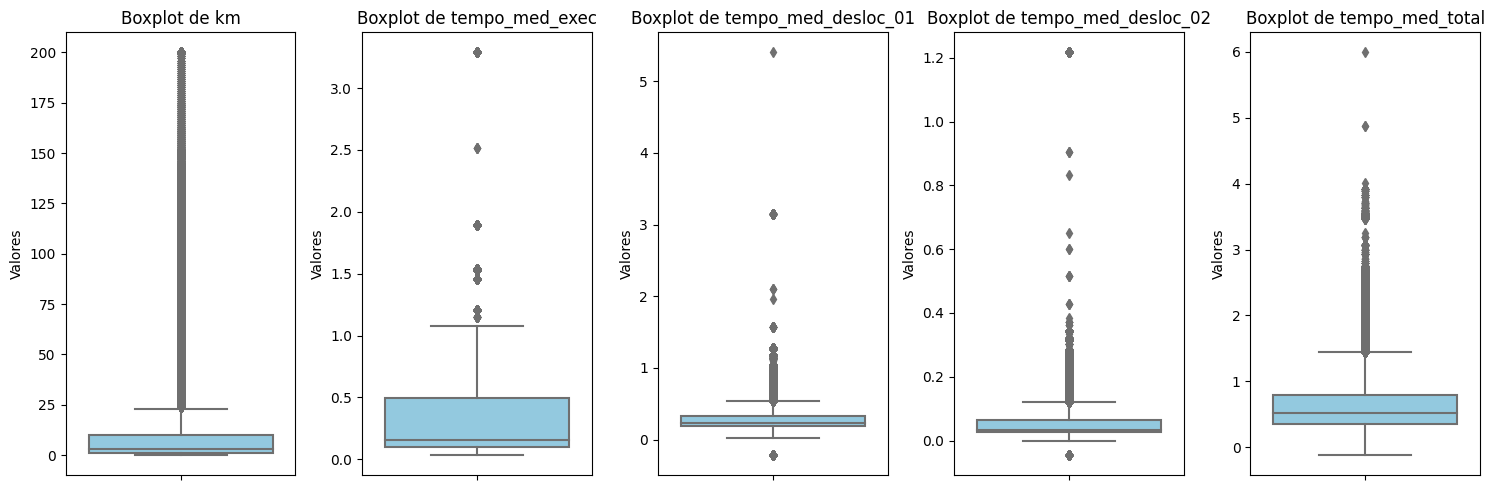

In [39]:
# Selecionando as colunas numéricas para o boxplot
colunas_numericas = ['km', 'tempo_med_exec', 'tempo_med_desloc_01', 'tempo_med_desloc_02', 'tempo_med_total']

# Configurando o tamanho da figura
plt.figure(figsize=(15, 5))

# Plotando os boxplots para as colunas numéricas
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(1, len(colunas_numericas), i)
    sns.boxplot(x=None, y=df_dimensionamento[coluna], color='skyblue', orient='v')
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel('Valores')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


A análise dos boxplots revela a presença significativa de valores atípicos (outliers) em diversos atributos numéricos. Mesmo após a aplicação de uma linha de corte de 200 km, conforme regra de negócio estabelecida, persistem valores atípicos no atributo. Esses outliers podem indicar situações extraordinárias que merecem uma análise mais detalhada.

No que se refere aos atributos relacionados ao tempo, como 'tempo_med_exec', 'tempo_med_desloc_01', 'tempo_med_desloc_02' e 'tempo_med_total', é necessário conduzir uma análise mais aprofundada. Esses cálculos levam em consideração diferentes aspectos, como o tipo de serviço (cod_servico) para o cálculo do tempo de execução e as localidades envolvidas (cod_local) para os tempos de deslocamento.

É essencial ressaltar que os tempos de deslocamento foram previamente avaliados por esta Companhia, considerando medições anteriores e comparando-os com os tempos reais, de modo a garantir a precisão dos dados. No entanto, é pertinente revisar esses dados à luz das informações coletadas e analisar possíveis discrepâncias ou variações que possam indicar padrões irregulares.

Nesse contexto, uma análise minuciosa desses tempos e uma revisão dos critérios estabelecidos para medição podem contribuir para a identificação de inconsistências ou pontos que mereçam ajustes, visando aprimorar a eficiência e precisão das medições de tempo em futuras análises.


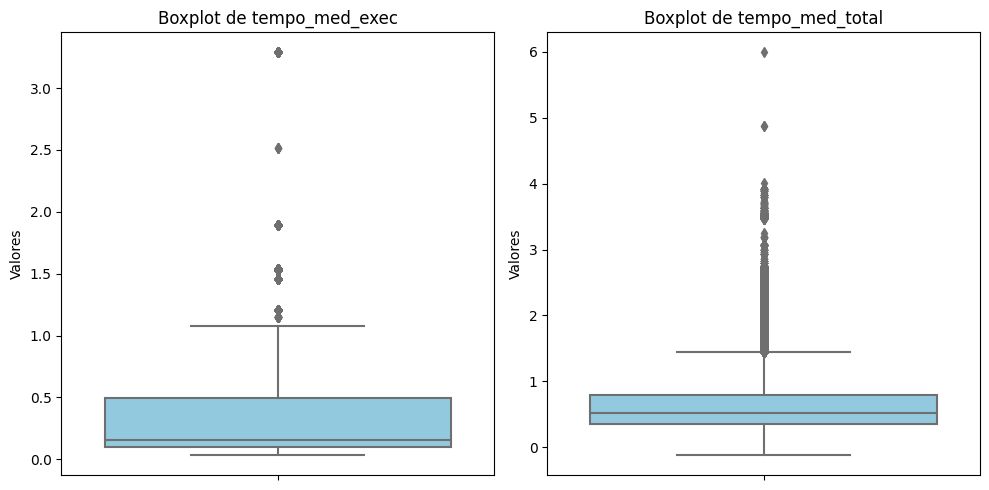

In [40]:
# Selecionando os atributos para o boxplot
atributos_selecionados = ['tempo_med_exec', 'tempo_med_total']

# Configuração da figura
plt.figure(figsize=(10, 5))

# Loop para plotar os boxplots para cada atributo
for i, atributo in enumerate(atributos_selecionados, 1):
    # Plotando o boxplot sem remoção de outliers
    plt.subplot(1, len(atributos_selecionados), i)
    sns.boxplot(y=df_dimensionamento[atributo], color='skyblue')
    plt.title(f'Boxplot de {atributo}')
    plt.ylabel('Valores')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


In [41]:
# Função para contar outliers2 com base no intervalo interquartil (IQR)
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limites para identificação de outliers2
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contando outliers na coluna especificada
    outliers2 = df[(df[column] < limite_inferior) | (df[column] > limite_superior)]

    return outliers2.shape[0]  # Retorna a quantidade de outliers2

# Selecionando as colunas numéricas para o boxplot
colunas_numericas = ['tempo_med_exec', 'tempo_med_total']

# Calculando e exibindo a quantidade de outliers para cada coluna
for coluna in colunas_numericas:
    qtd_outliers = count_outliers(df_dimensionamento, coluna)
    print(f"Quantidade de outliers em '{coluna}': {qtd_outliers}")

Quantidade de outliers em 'tempo_med_exec': 42763
Quantidade de outliers em 'tempo_med_total': 77972


**Memorando de Análise - Exclusão de Outliers**

No processo de análise dos tempos de execução dos serviços, representados pela variável tempo_med_total, notamos a presença de valores discrepantes (outliers) que impactam a distribuição dos dados. Esses valores atípicos podem distorcer a análise estatística e influenciar as previsões ou conclusões resultantes do modelo.

Ao realizar uma investigação mais aprofundada, identificamos que a quantidade de outliers na variável tempo_med_total é de 77.972. Considerando que nossa base de dados contém 3.354.326 registros, observamos que esses outliers representam aproximadamente 3% do total de dados analisados.

Diante do impacto significativo desses outliers nos resultados e considerando a necessidade de manter a consistência e confiabilidade da análise, foi decidido proceder com a exclusão desses dados discrepantes. Essa decisão visa aprimorar a precisão das análises estatísticas e modelos subsequentes, garantindo resultados mais robustos e representativos para o processo de planejamento.

É fundamental ressaltar que essa ação de exclusão dos outliers é realizada com o propósito de aprimorar a qualidade da análise, buscando uma melhor compreensão dos padrões e comportamentos subjacentes aos tempos de execução dos serviços. A eliminação desses valores extremos permite uma visão mais precisa e realista da distribuição dos dados, contribuindo para uma tomada de decisão mais informada e assertiva em relação ao dimensionamento das equipes e ao planejamento das atividades.

A seguir, plotou-se novo boxplots dos atributos em questção, e percebe-se que o problema dos outliers foram sanados.



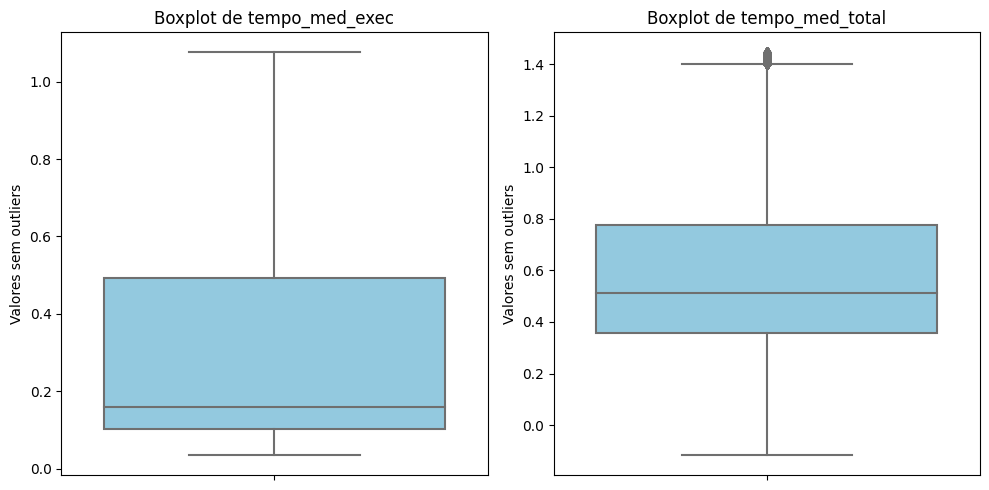

In [42]:
# Função para remover outliers com base no intervalo interquartil (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limites para identificação de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Retornando o DataFrame sem os outliers na coluna especificada
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]

# Selecionando os atributos para o boxplot
atributos_selecionados = ['tempo_med_exec', 'tempo_med_total']

# Configuração da figura
plt.figure(figsize=(10, 5))

# Loop para plotar os boxplots para cada atributo
for i, atributo in enumerate(atributos_selecionados, 1):
    # Removendo outliers para o atributo atual
    df_sem_outliers = remove_outliers(df_dimensionamento, atributo)

    # Plotando o boxplot sem outliers
    plt.subplot(1, len(atributos_selecionados), i)
    sns.boxplot(y=df_sem_outliers[atributo], color='skyblue')
    plt.title(f'Boxplot de {atributo}')
    plt.ylabel('Valores sem outliers')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


In [43]:
# Avaliando o dataframe sem as instâncias que foram consideradas outliers
df_sem_outliers.shape

(3276354, 16)

In [44]:
# Criando dataframe sem os outliers para continuação do dimensionamento de equipes
df_dimens_sem_outliers = df_sem_outliers
df_dimens_sem_outliers.head(10)

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec,tempo_med_desloc_01,tempo_med_desloc_02,tempo_med_total
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103,0.255605,0.026402,0.436109
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.270653,0.065135,0.472823
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361,0.360094,0.079315,0.522770
5,7078276988697951,501,0,2022-11-01 01:15:00,2022-11-01 01:21:00,2022-11-01 01:23:00,2022-11-01 01:23:00,7216,3,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
6,7078277520331851,501,0,2022-11-01 01:25:00,2022-11-01 01:31:00,2022-11-01 01:39:00,2022-11-01 01:39:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
7,7078277554791101,550,0,2022-11-01 01:58:00,2022-11-01 02:07:00,2022-11-01 02:31:00,2022-11-01 02:31:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
8,7078277586154951,550,0,2022-11-01 02:31:00,2022-11-01 02:39:00,2022-11-01 02:56:00,2022-11-01 02:56:00,7216,1,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
9,7078277528942201,501,0,2022-11-01 02:57:00,2022-11-01 02:57:00,2022-11-01 03:06:00,2022-11-01 03:06:00,7216,1,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967


Portanto, o nosso dataframe original está devidamente preparado para conduzir análises de dados e cálculos, visando determinar as quantidades de equipes necessárias para atender às demandas de prestação de serviços da Companhia no próximo ano.

# **6. Definição do dimensionamento**

Neste momento, iniciou-se apresentando um resumo do dataframe, com seus atributos, com uma sucinta descrição do que cada um apresenta de informações.

  *   **ordem_servico:** Documento oficial registrado na solicitação dos serviços pelos clientes.
  *   **cod_servico:** Código representando o tipo de serviço requisitado pelos clientes.
  *   **conclusao:** Código indicando a conclusão do serviço executado pela equipe, informando se foi realizado, impedido ou se é improdutivos.
  *   **dt_saida:** Data e hora em que a equipe partiu para realizar o serviço.
  *   **dt_inicio:** Data e hora do início da execução do serviço pela equipe.
  *   **dt_fim:** Data e hora do término da execução do serviço pela equipe.
  *   **dt_termino:** Data e hora em que a equipe retornou do serviço realizado ou partiu para o próximo atendimento.
  *   **cod_local:** Código da localidade onde o serviço foi prestado aos clientes.
  *   **km:** Total de quilômetros percorridos pela equipe para atender o serviço.
  *   **status:** Estado de conclusão do serviço, classificando se foi executado, impedido ou é improdutivos.
  *   **grupo:** Categorias que agrupam diferentes tipos de serviços.
  *   **Tipo_equipe:** Tipo de equipe adequado para executar determinado serviço, considerando as regulamentações vigentes.
  *   **tempo_med_exec:** Tempo médio de execução para cada tipo de serviço, representando a média do tempo gasto na realização do serviço específico.
  *   **tempo_med_desloc_01:** Tempo médio de deslocamento até o local do serviço, considerando as diferentes localidades onde os serviços são prestados.
  *   **tempo_med_desloc_02:** Tempo médio de deslocamento do local do serviço de volta, também considerando as variações nas localidades.
  *   **tempo_med_total:** Soma dos tempos médios de execução, deslocamento até o local do serviço e deslocamento de volta. Essa métrica representa o tempo total estimado para cada tipo de serviço, incluindo tanto a execução quanto os deslocamentos necessários.


Prosseguindo com a análise e cálculos, o intuito é determinar o número ideal de equipes necessárias, considerando as quantidades de serviços, tempos de execução e deslocamento. Essa etapa é crucial para alcançar nosso objetivo de estabelecer a quantidade mínima de equipes capazes de atender às demandas de prestação de serviços de forma eficaz e eficiente.



In [45]:
# Visualizando as 5 (cinco) primeiras linhas do dataframe sem outliers, em relação aos tempo médio de execcução dos serviços
df_dimens_sem_outliers.head()

,ordem_servico,cod_servico,conclusao,dt_saida,dt_inicio,dt_fim,dt_termino,cod_local,km,status,grupo,Tipo_equipe,tempo_med_exec,tempo_med_desloc_01,tempo_med_desloc_02,tempo_med_total
0,7078276922376451,550,0,2022-10-31 23:46:00,2022-10-31 23:59:00,2022-11-01 00:16:00,2022-11-01 00:16:00,7216,2,Com_Executado,Grupo_500,DUPLA,0.272626,0.166425,0.021506,0.460558
1,7078276987040001,501,0,2022-11-01 00:20:00,2022-11-01 00:24:00,2022-11-01 00:27:00,2022-11-01 00:27:00,7216,4,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.166425,0.021506,0.324967
2,7078278398864751,319,0,2022-11-01 00:26:00,2022-11-01 00:27:00,2022-11-01 00:32:00,2022-11-01 00:51:18,7072,18,Com_Executado,Grupo_300,DUPLA,0.154103,0.255605,0.026402,0.436109
3,7078277615745701,501,0,2022-11-01 00:03:00,2022-11-01 00:41:00,2022-11-01 00:52:00,2022-11-01 00:59:14,2758,42,Com_Executado,Grupo_500,INDIVIDUAL,0.137036,0.270653,0.065135,0.472823
4,7078277435242301,540,0,2022-10-31 23:46:00,2022-11-01 00:39:00,2022-11-01 00:58:00,2022-11-01 01:12:40,1348,48,Com_Executado,Grupo_500,INDIVIDUAL,0.083361,0.360094,0.079315,0.522770


In [46]:
# Agrupar e somar os valores do atributo tempo_med_local
soma_tempo_med_local = df_dimens_sem_outliers.groupby(['grupo'])['tempo_med_total'].sum().reset_index()

# Dividir a soma por 2068 horas (2068 refere-se ao total de horas de uma equipe trabalhando 7h50M por dia, 22 dias por mês, 12 meses no ano)
soma_tempo_med_local['qtdes_equipes'] = soma_tempo_med_local['tempo_med_total'] / 2068

# Arredondar a soma para duas casas decimais
soma_tempo_med_local['qtdes_equipes'] = soma_tempo_med_local['qtdes_equipes'].round(2)

# Remover a coluna 'tempo_med_total' do DataFrame para exibição
soma_tempo_med_local = soma_tempo_med_local[['grupo', 'qtdes_equipes']]

# Adicionar o 'Total' no DataFrame, caso não esteja presente
if not soma_tempo_med_local['grupo'].str.contains('Total').any():
    soma_total = soma_tempo_med_local['qtdes_equipes'].sum()
    nova_linha = pd.DataFrame({'grupo': ['Total'], 'qtdes_equipes': [soma_total]})
    soma_tempo_med_local = pd.concat([soma_tempo_med_local, nova_linha], ignore_index=True)

# Exibir o resultado sem a coluna 'tempo_med_total'
print(soma_tempo_med_local)



          grupo  qtdes_equipes
0     Grupo_100         130.44
1   Grupo_10000           6.12
2    Grupo_2000           1.61
3     Grupo_300          34.61
4    Grupo_3000          29.08
5     Grupo_400         147.33
6     Grupo_401          31.04
7     Grupo_500         135.20
8    Grupo_9900          97.16
9    Grupo_9999         326.23
10        Total         938.82


A estrutura do dataframe foi devidamente configurada para a realização dos cálculos, obedecendo às técnicas e regras de negócios definidas previamente. Utilizou-se a métrica do tempo médio total, expresso em horas por serviço, somando e agrupando esses valores pelo atributo 'grupo'. Dessa forma, alcançamos o cálculo preciso do valor total de horas requeridas para cada categoria de serviço, representada pelos grupos específicos estabelecidos.

Na determinação das quantidades de equipes necessárias para o dimensionamento, consideramos uma equipe em atividade na prestação de serviços por 7 horas e 50 minutos diários, durante 22 dias mensais e ao longo dos 12 meses do ano, totalizando aproximadamente 2068 horas trabalhadas anualmente por equipe.

Após a conclusão desses cálculos, obtivemos as quantidades necessárias de equipes para cada grupo de trabalho, com base nas estimativas das horas totais requeridas para execução dos serviços.

Abaixo, segue o resumo das quantidades mínimas de equipes por grupo de serviços ´prestados:

  **Grupo de Serviços      - Qtdes Equipes**

  *   Grupo_100           - 130.44
  *   Grupo_10000         - 6.12
  *   Grupo_2000          - 1.61
  *   Grupo_300           - 34.61
  *   Grupo_3000          - 29.08
  *   Grupo_400           - 147.33
  *   Grupo_401           - 31.04
  *   Grupo_500           - 135.20
  *   Grupo_9900          - 97.16
  *   Grupo_9999          - 326.23
  *   Total               - 938.82

Os valores das horas médias totais por grupo, foram necessárias para definir e servir de referência para determinar as quantidades de equipes necessárias visando atender às demandas dos serviços da Companhia no próximo ano.

Com base neste estudo, chegou-se a uma **quantidade mínima de 938 equipes**, para atender as demandas de serviços da Corporação.

In [47]:
# Agrupar e somar os valores do atributo tempo_med_local
soma_tempo_med_local = df_dimens_sem_outliers.groupby(['cod_local'])['tempo_med_total'].sum().reset_index()

# Dividir a soma por 2068 horas (2068 refere-se ao total de horas de uma equipe trabalhando 7h50M por dia, 22 dias por mês, 12 meses no ano)
soma_tempo_med_local['qtdes_equipes'] = soma_tempo_med_local['tempo_med_total'] / 2068

# Arredondar a soma para duas casas decimais
soma_tempo_med_local['qtdes_equipes'] = soma_tempo_med_local['qtdes_equipes'].round(2)

# Remover a coluna 'tempo_med_total' do DataFrame para exibição
soma_tempo_med_local = soma_tempo_med_local[['cod_local', 'qtdes_equipes']]

# Adicionar o 'Total' no DataFrame, caso não esteja presente
if not soma_tempo_med_local['cod_local'].str.contains('Total').any():
    soma_total = soma_tempo_med_local['qtdes_equipes'].sum()
    nova_linha = pd.DataFrame({'cod_local': ['Total'], 'qtdes_equipes': [soma_total]})
    soma_tempo_med_local = pd.concat([soma_tempo_med_local, nova_linha], ignore_index=True)

# Exibir o resultado sem a coluna 'tempo_med_total'
print(soma_tempo_med_local)


     cod_local  qtdes_equipes
0         1006           0.32
1         1012           0.59
2         1018           0.02
3         1024           0.02
4         1030           0.29
...        ...            ...
1078      7864           0.46
1079      7870           0.72
1080      7876           0.01
1081      7882           0.07
1082     Total         938.74

[1083 rows x 2 columns]


Dando prosseguimento, seguindo a mesma estratégia, aplicou-se o cálculo para cada localidade, e obtivemos as quantidades necessárias de equipes para cada local, com base nas estimativas das horas totais requeridas para execução dos serviços.

Abaixo, segue o resumo das quantidades mínimas de equipes por localidades:

Local dos Serviços - Qtdes equipes

  *   1006                - 0.32
  *   1012                - 0.59
  *   1018                - 0.02
  *   1024                - 0.02
  *   1030                - 0.29
  *   ...                   ...
  *   7894                - 0.46
  *   7870                - 0.72
  *   7876                - 0.01
  *   7882                - 0.07
  *   Total               - 938.82

Com base neste estudo, chegou-se a uma **quantidade mínima de 938 equipes**, para atender as demandas de serviços da Corporação de forma global. Porém utilizando as localidades como base, conseguimos direcionar as forças de trabalhos necessárias em cada região da prestação do serviços.

In [48]:
# Agrupar e somar os valores do atributo tempo_med_local
soma_tempo_med_local = df_dimens_sem_outliers.groupby(['Tipo_equipe'])['tempo_med_total'].sum().reset_index()

# Dividir a soma por 2068 horas (2068 refere-se a total de horas de uma equipe trabalhando 7h50M por dia, 22 dias por mês, 12 meses no ano)
soma_tempo_med_local['tempo_med_total'] = soma_tempo_med_local['tempo_med_total'] / 2068


# Arredondar a soma para duas casas decimais
soma_tempo_med_local['tempo_med_total'] = soma_tempo_med_local['tempo_med_total'].round(2)

# Adicionar o 'Total' no DataFrame, caso não esteja presente
if not soma_tempo_med_local['Tipo_equipe'].str.contains('Total').any():
    soma_total = soma_tempo_med_local['tempo_med_total'].sum()
    nova_linha = pd.DataFrame({'Tipo_equipe': ['Total'], 'tempo_med_total': [soma_total]})
    soma_tempo_med_local = pd.concat([soma_tempo_med_local, nova_linha], ignore_index=True)

# Exibir o resultado
print(soma_tempo_med_local)

  Tipo_equipe  tempo_med_total
0       DUPLA           589.21
1  INDIVIDUAL           349.64
2       Total           938.85


Com base neste estudo, chegou-se a uma **quantidade mínima de 938 equipes**, para atender as demandas de serviços da Corporação.

Por fim, cálculou-se as quantidades mínimas de equipes necessárias por tipo de equipe, para atender as demandas de prestação de serviços da Corporação para o próximo ano.

**Tipo_equipe     - Qtdes Equipes**

*   DUPLA           - 589.21
*   INDIVIDUAL      - 349.64
*   Total           - 938.85


# **7. Conclusão**

Após um rigoroso processo de análise e tratamento de dados, foi possível realizar um estudo detalhado sobre a prestação de serviços da Corporação, visando o dimensionamento da força de trabalho necessária para atender às demandas. Foram empregadas diversas técnicas estatísticas, tratamento de valores ausentes, transformação de tipos de dados e cálculos criteriosos para obter insights valiosos.

Ao longo desse estudo, identificamos padrões de execução de serviços, tempos médios de deslocamento e execução, bem como a distribuição das demandas por categorias de serviços e localidades. A aplicação de regras de negócio para limitação de valores atípicos (outliers) e a definição de métricas como o tempo médio total proporcionaram uma visão mais clara das necessidades de recursos.

É importante ressaltar que este projeto representa um estudo inicial e direcionado. As conclusões e diretrizes resultantes devem ser submetidas às áreas competentes da Corporação para uma avaliação aprofundada e tomada de decisões embasadas em conjunto com as políticas e estratégias organizacionais.

Este trabalho é apenas um primeiro passo na jornada de dimensionamento da força de trabalho, e há espaço para aprimoramentos futuros. A aplicação de técnicas avançadas, como machine learning, inteligência artificial e outras abordagens emergentes, pode trazer insights ainda mais precisos e eficazes para o dimensionamento e otimização dos recursos da Corporação.

É imprescindível ressaltar que a eficácia das decisões dependerá de uma análise contínua e adaptação às mudanças e desafios do ambiente corporativo.